In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [18]:
from cipher.caesar import *
from cipher.affine import *
from cipher.keyword_cipher import *
from cipher.column_transposition import *

from support.text_prettify import *
from support.utilities import *
from support.plot_frequency_histogram import *
%matplotlib inline

In [3]:
challenge_number = 5
plaintext_a_filename = f'{challenge_number}a.plaintext'
plaintext_b_filename = f'{challenge_number}b.plaintext'
ciphertext_a_filename = f'{challenge_number}a.ciphertext'
ciphertext_b_filename = f'{challenge_number}b.ciphertext'

In [4]:
ca = open(ciphertext_a_filename).read()
cb = open(ciphertext_b_filename).read()

sca = sanitise(ca)
pca = letters(ca)
pta = depunctuate(ca)

scb = sanitise(cb)
pcb = letters(cb)
ptb = depunctuate(cb)

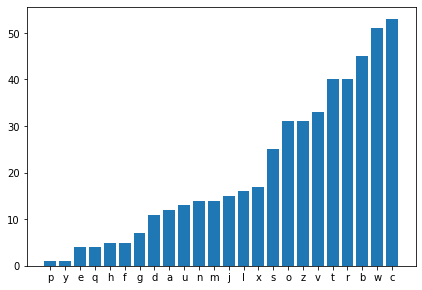

In [9]:
fc = collections.Counter(sca)
plot_frequency_histogram(fc, sort_key=fc.get)

In [5]:
kshifta, score = caesar_break(sca, fitness=Ptrigrams)
kshifta

14

In [6]:
pa = caesar_decipher(sca, kshifta)
print(pa)

foodhoaihbfxkpdnfeeadlnoijxihofxonahozdmldhxzgahanolvimflgfgdhonnfvviptaeeqdolfrdeeahyoihiltfvnoijgannaihoiolfhnjilohilnczvslinoixcimzdfrvtfodloifnfmdeixfoaihnoijzfllvfncdsgdoiimmdlvipiplnpjjilonoijqinnahodeeaydhxdldjilonnpyydnoozfoozdydlgfhgaeaoflvfldxeindevgihaoilahyfeeqifonfhsmeayzonahfhsipoimhiltfvnoijnpyydnonjeaooahyxflyinoijxaraeafhmeayzonfenilancvnoijlfmzfrdimmdldsfjefhdnoijtaeexihofxoviprafozddgqfnnvnoijiozdlxiggphaxfoaihxzfhhdenahndxpldnoijsihioldjevoiozanodedylfggdnnfyddhsn


In [10]:
(kworda, kwrapa), score = keyword_break_mp(sca, fitness=Ptrigrams)
kworda, kwrapa

('telegram', <KeywordWrapAlphabet.from_last: 2>)

In [11]:
pa = keyword_decipher(sca, kworda, kwrapa)
print(pa)

attentionjacquesallierstopcontactsinthefrenchministryofarmamentssayyouwillbetravellingtonorwaystopmissiontotransportnorskhydrostockofheavywatertoasafelocationstopharryaskedmetoofferyouoursupportstopbossintelligencereportssuggestthatthegermanmilitaryarecloselymonitoringallboatsandflightsinandoutofnorwaystopsuggestsplittingcargostopcivilianflightsalsoriskystoprafhaveofferedaplanestopwillcontactyouviatheembassystopothercommunicationchannelsinsecurestopdonotreplytothistelegrammessageends


In [12]:
fpa = lcat(tpack(segment(pa)))
print(fpa)

attention jacques allier stop contacts in the french ministry of armaments say you will be
travelling to norway stop mission to transport norsk hydro stock of heavy water to a safe locations
top harry asked me to offer you our support stop boss intelligence reports suggest that the german
military are closely monitoring all boats and flights in and out of norway stop suggest splitting
cargo stop civilian flights also risky stop raf have offered a planes top will contact you via the
embassy stop other communication channels insecure stop do not reply to this telegram message ends


In [13]:
open(plaintext_a_filename, 'w').write(fpa)

585

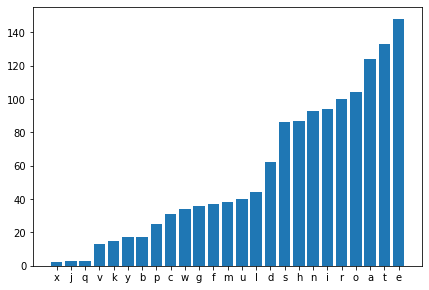

In [14]:
fc = collections.Counter(scb)
plot_frequency_histogram(fc, sort_key=fc.get)

In [16]:
rscb = cat(reversed(cb))
rscb

'\nf ryain lyelA ivmbe odahe swrwh cmoum eeirn ortdt eoier ndnes iutos grtao setth cnsca eoeig tanel aubyh rweeb utumt teieu rsaDo mflkr oigge yhitd rdaen hndue nuron odkoa ocfde talsh nhatd etaph ltnth gahdi oswea rcroo ddufn otnni asnat irari domkr dHsyh ooetN eotik naurn kbitj nsRau ngreh tOihm otiko wnfey ahrci gaowo thwao ontnk tbdwu erNyw oaeoe alvds tieti luelr heAat tsoli sbttp iIsva iitso shfet ueorp pnwhg ittio sshdo xsreo tcrne fruta baeci rrsag esnta phset meiem hdaet srtno audaf lneir dvreh naaed FRapA latnt harpd toeli edera hfier sntat trOea ugchy ietmh tiinc rfeao ditnn oucfl odute tbwle hifge shdst aeidh mhdha tthme oswko lhcoi etnsS uniiq rhree trsfu teFmh iaenr gtofm smnsi ieasw maeln risno ldaAc hgaer nitog fswsn aohte etrie utdba shrec eedar nieht dtosd abrgr teanr buguO oemHt aphnl eaict ntgdr eiert gdahn etifh ltegi pntic enrwe hidtt akass fwwfa eLhtu efapt nltmr etoht Wfear egyaH vrpnt oirss atnha aetwn thgit sScpu ecttk iensr geeat sphae tirhw taeom gtmde srmoA

In [21]:
(kwordb, fillb, emptyb), score = column_transposition_break_mp(scb, fitness=Ptrigrams)
(kwordb, fillb, emptyb), score

(((4, 1, 3, 5, 0, 2), False, False), -4695.301044758612)

In [23]:
pb = column_transposition_decipher(scb, kwordb, fillcolumnwise=fillb, emptycolumnwise=emptyb)
pb

'analysisofsignalstrafficfromthefrenchministryofarmamentsshowthatjacquesallieramemberofthedeuxiemebureauwasinvolvedinsomethingimportantwearrangedtohavehimfollowedandhewasobservedtopurchasetraveldocumentsfornorwaypreviouslyallierhadworkedatthebanquedeparisdespaysbasandrecordsshowthatthisorganisationheldmostofnorskhydrossharesatthatpointleadingtothesuppositionthathewouldbevisitingthehydroelectricplantinrjukanagentswerechargedwithfollowinghimandreportingonhismovementswhileinnorwayhepurchasedspaceforacargoofaroundonehundredkilogramsonaflightfromstockholmtoamsterdamtogetherwithapassengerticketsuspectingthathewastransportingheavywaterfromtheplanttheluftwaffewastaskedwithinterceptingtheflightandredirectingtheplanetohamburgouragentsboardeditthereandsearcheditbuttherewasnosignofthecargoandalliersnamewasmissingfromthemanifestfurtherenquiriesinstockholmshowedthathehadmissedtheflightbutwecouldfindnotraceofhiminthecityouragentsattheairfieldreportedthatanrafplanehadarrivedandleftaroundthesametimeast

In [24]:
fpb = lcat(tpack(segment(pb)))
print(fpb)

analysis of signals traffic from the french ministry of armaments show that jacques allier a member
of the deuxieme bureau was involved in something important we arranged to have him followed and he
was observed to purchase travel documents for norway previously allier had worked at the banque de
paris des pays bas and records show that this organisation held most of norsk hydros shares at that
point leading to the supposition that he would be visiting the hydroelectric plant in rj uk an
agents were charged with following him and reporting on his movements while in norway he purchased
space for a cargo of around one hundred kilograms on a flight from stockholm to amsterdam together
with a passenger ticket suspecting that he was transporting heavy water from the plant the luftwaffe
was tasked with intercepting the flight and redirecting the plane to hamburg our agents board edit
there and search edit but there was no sign of the cargo and all iers name was missing from the
manifest furt

In [25]:
open(plaintext_b_filename, 'w').write(fpb)

1688

In [26]:
transpositions[kwordb]

['menial',
 'pitman',
 'shtick',
 'thules',
 'thumbs',
 'thymes',
 'merrick',
 'pepsico',
 'pittman',
 'reticle',
 'retrial',
 'revival',
 'shticks',
 'skulker',
 'skylark',
 'slummer',
 'titular',
 'toupees',
 'tourist',
 'reticent',
 'skylarks',
 'tourists',
 'reticence']